# DSKI ML

## Imports

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np

## Load Data

In [115]:
# Laden des Datensatzes
file_path = 'data/heart.csv'
df = pd.read_csv(file_path)

## Explorative Datenanalyse

### Basis Analyse - Datenqualität

In [116]:
# Überblick über die Daten verschaffen
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [117]:
# Überprüfung auf fehlende Werte
print("\nAnzahl fehlender Werte pro Spalte:")
print(df.isnull().sum())

# Überprüfung auf Duplikate
duplikate = df.duplicated().sum()
print(f"\nAnzahl der Duplikate: {duplikate}")

# Verteilung der Zielvariable
print("\nVerteilung der Herzerkrankungen:")
print(df['HeartDisease'].value_counts(normalize=True))


Anzahl fehlender Werte pro Spalte:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Anzahl der Duplikate: 0

Verteilung der Herzerkrankungen:
HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


### Visualisierung von numerischen Feature

In [118]:
# Wir filtern die numerischen Spalten heraus
numerische_spalten = df.select_dtypes(include=['float64', 'int64']).columns

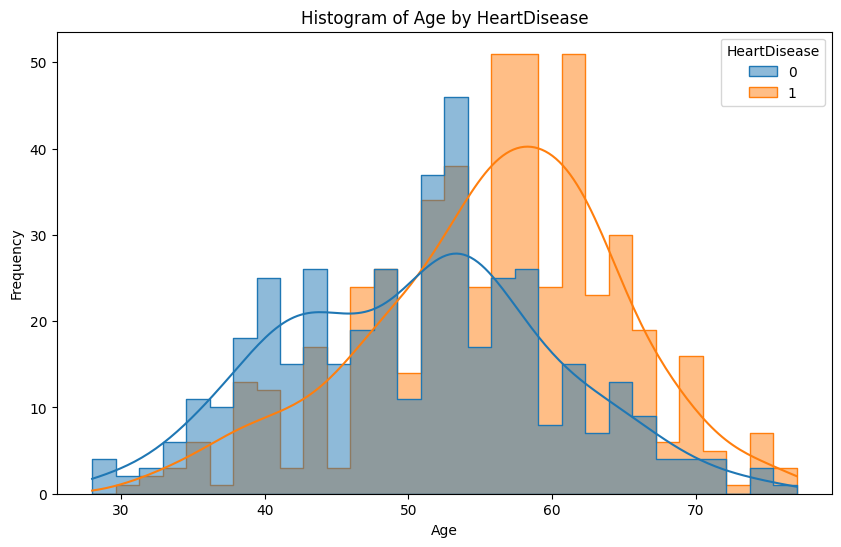

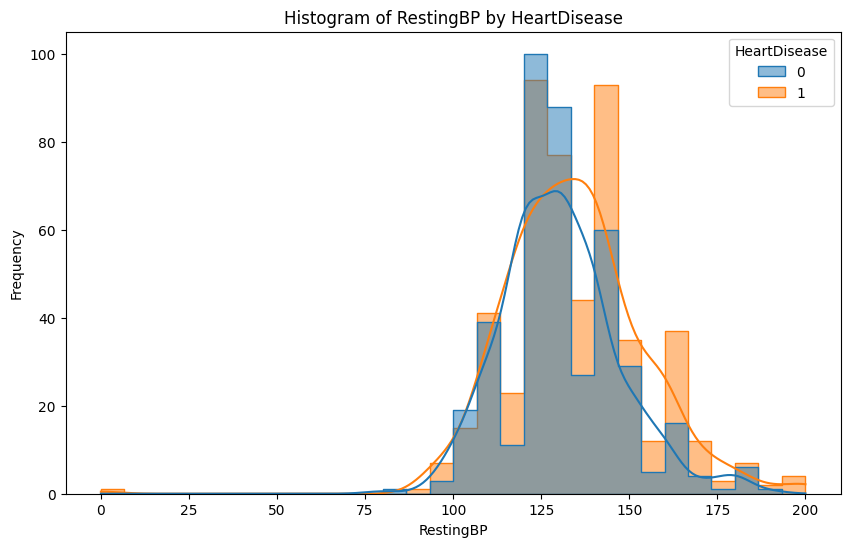

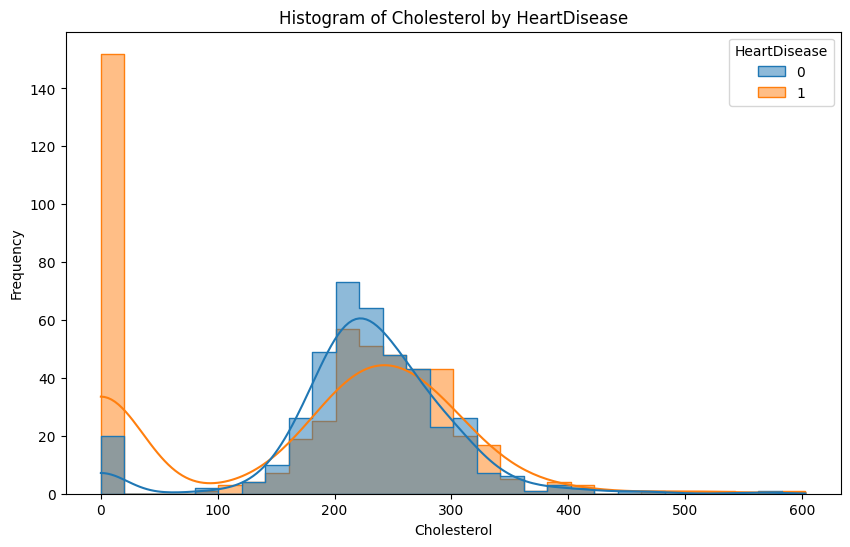

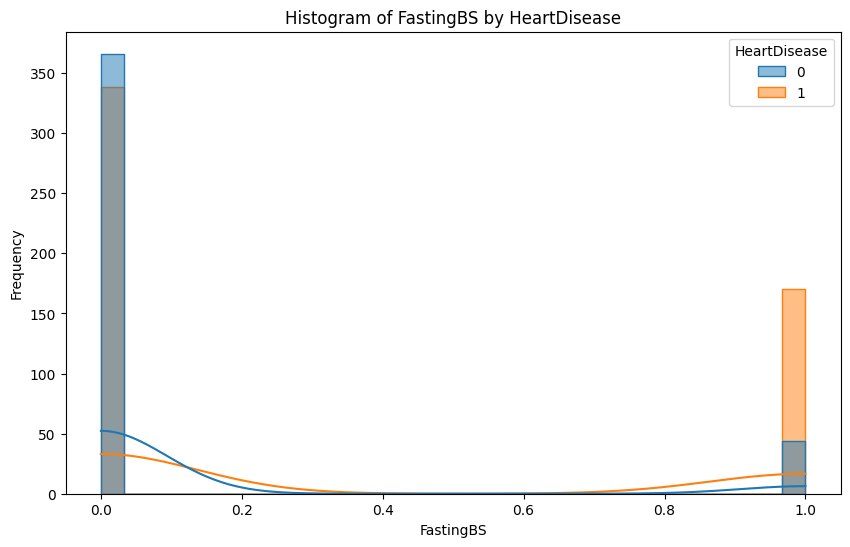

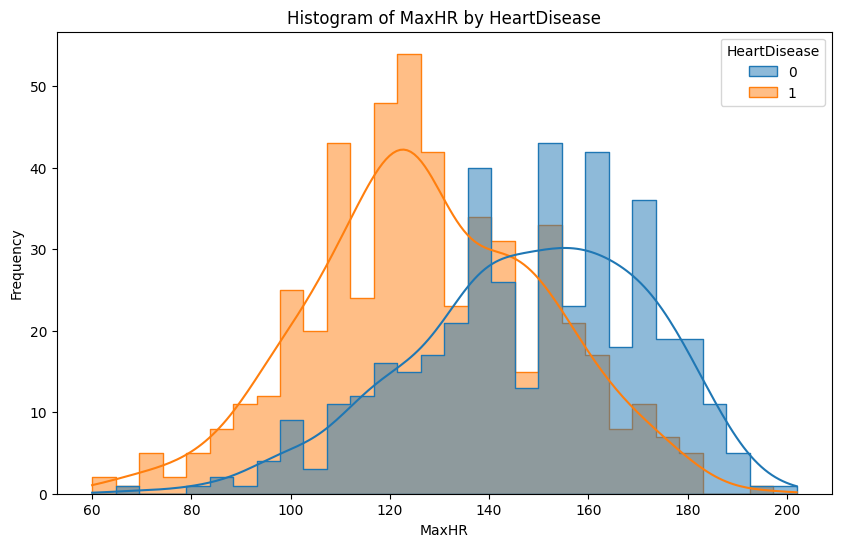

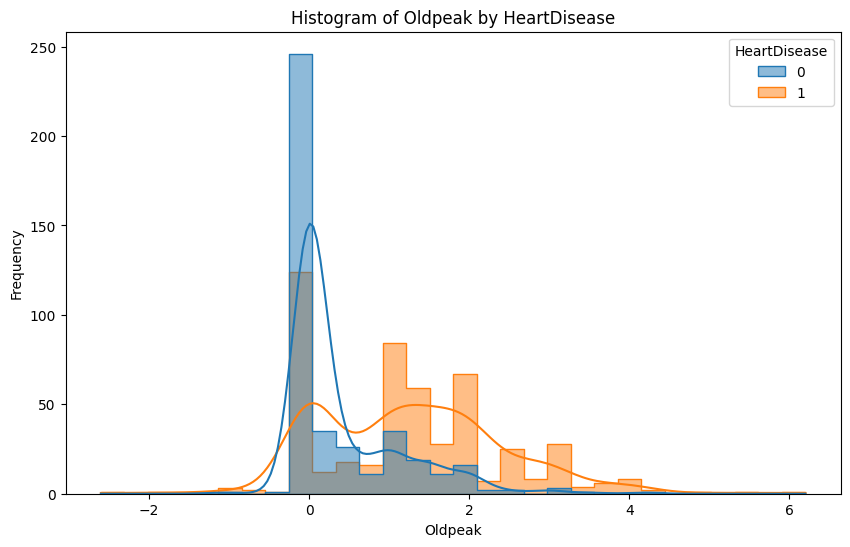

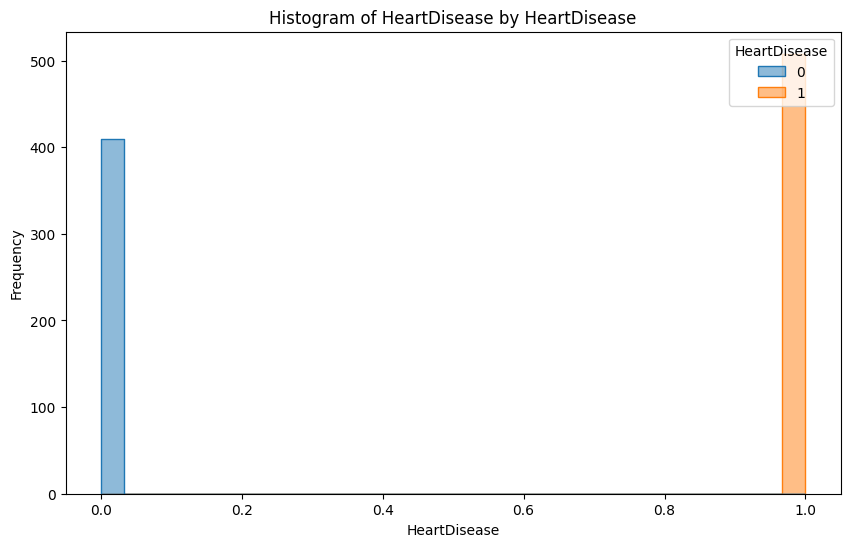

In [119]:
# Histogramme für numerische Variablen mit HeartDisease als Farbe
for column in numerische_spalten:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column, hue='HeartDisease', bins=30, kde=True, palette='tab10', element="step", alpha=0.5)
    plt.title(f'Histogram of {column} by HeartDisease')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#### Boxplots- Ausreißer Analyse

Da der Nüchternblutzucker(FastingBS) binäre Werte hat macht eine Boxplotdarstellung keinen Sinn (siehe .ReadMe).

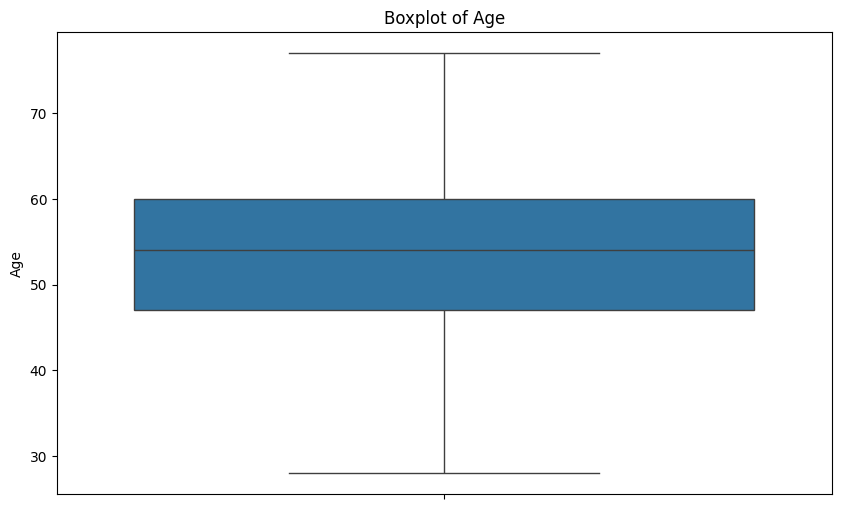

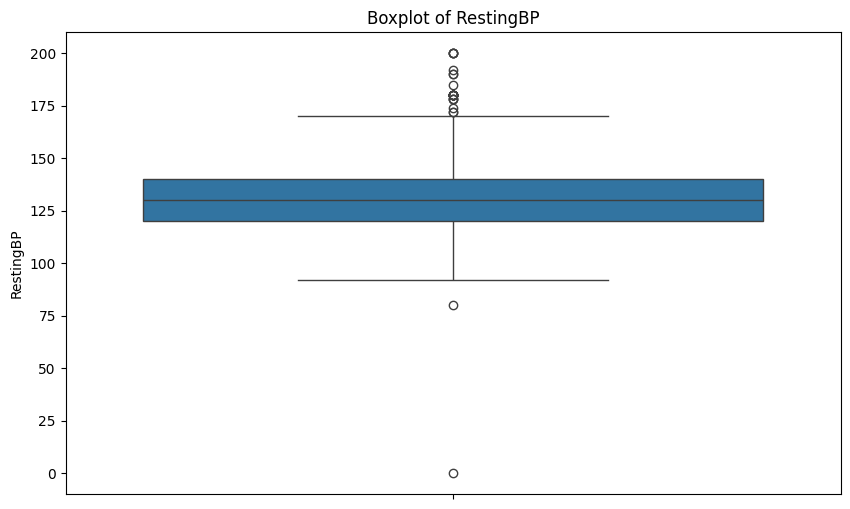

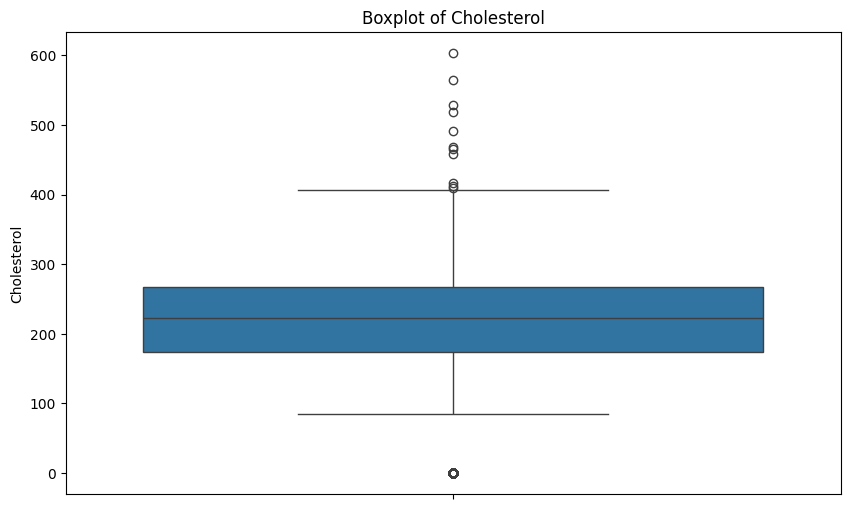

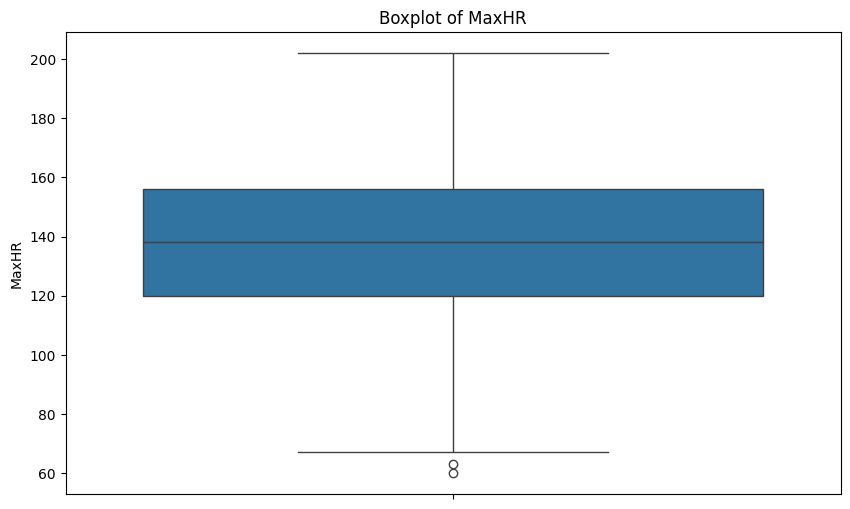

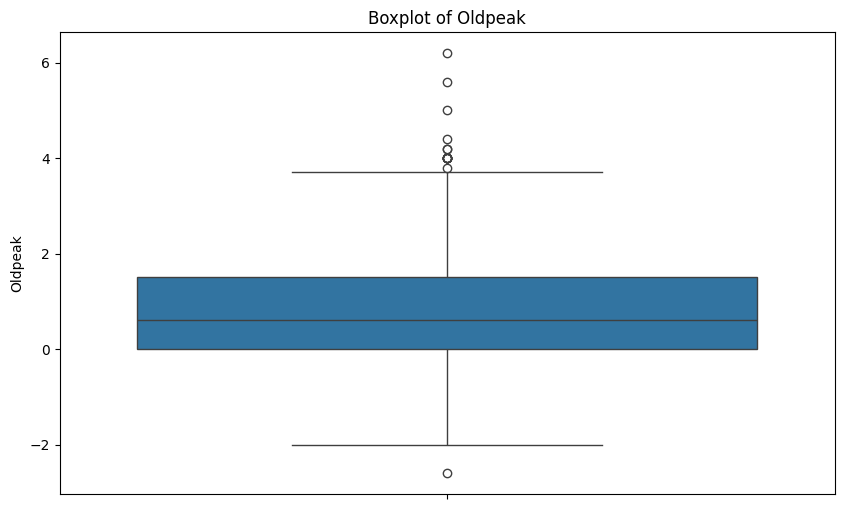

In [120]:
exclude_columns = ['FastingBS', 'HeartDisease']
boxplot_columns = [col for col in numerische_spalten if col not in exclude_columns]

for column in boxplot_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

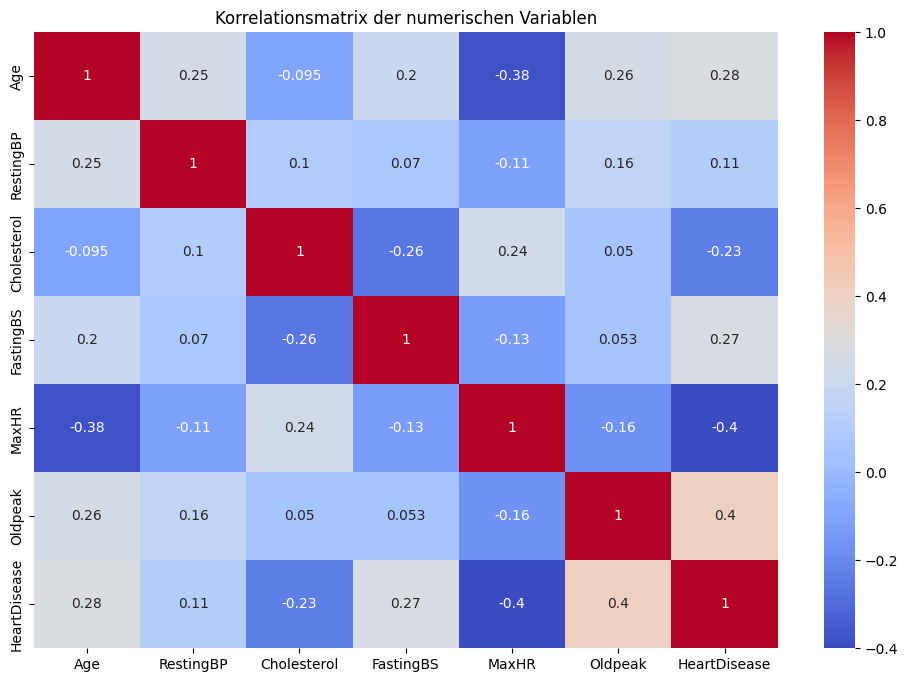

In [121]:
# Wir erstellen die Korrelationsmatrix nur für die numerischen Spalten
correlation_matrix = df[numerische_spalten].corr()

# Korrelationsmatrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix der numerischen Variablen')
plt.show()

### Visualisierung von kategorischen Feature

#### Häufigkeitsverteilungen

/var/folders/vr/klm94mws7lsd0vj7h5gd2bqw0000gn/T/ipykernel_30013/848146752.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='tab10')


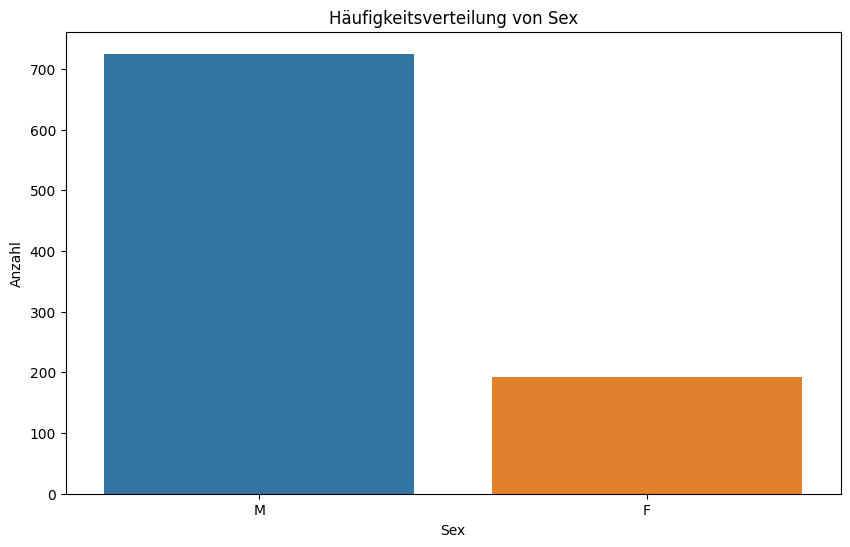

/var/folders/vr/klm94mws7lsd0vj7h5gd2bqw0000gn/T/ipykernel_30013/848146752.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='tab10')


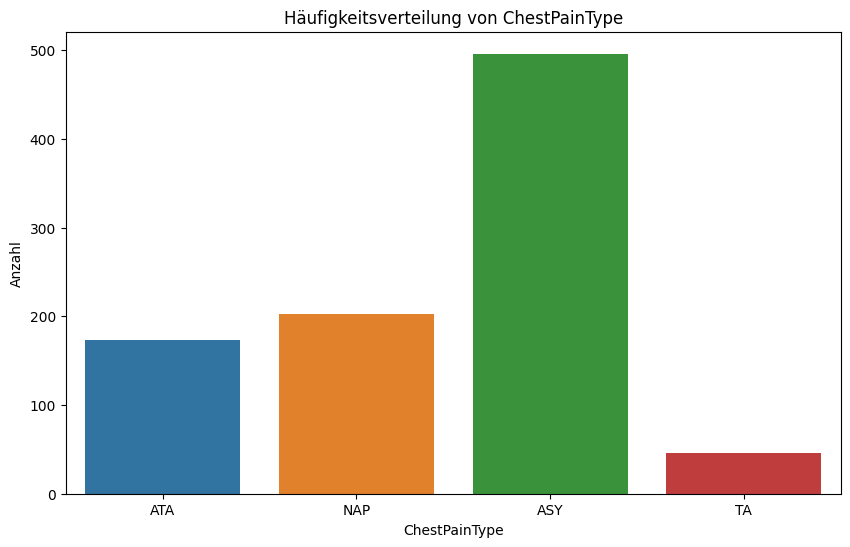

/var/folders/vr/klm94mws7lsd0vj7h5gd2bqw0000gn/T/ipykernel_30013/848146752.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='tab10')


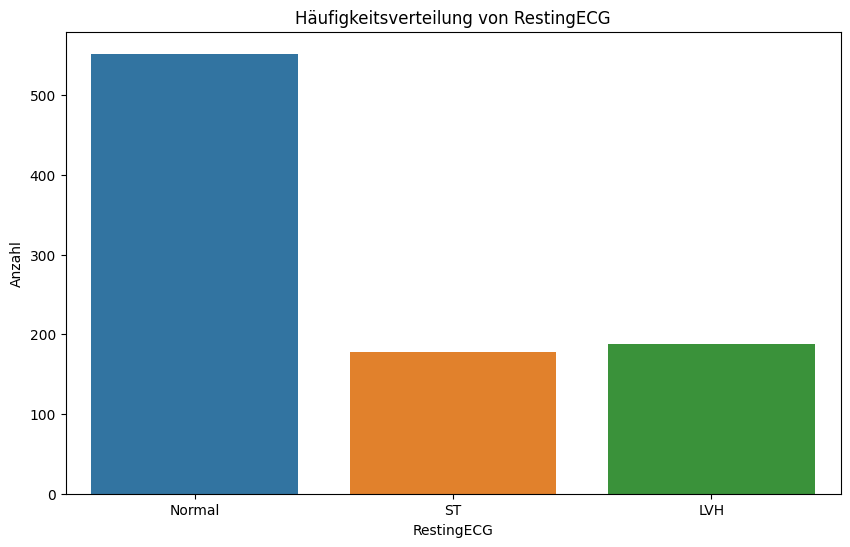

/var/folders/vr/klm94mws7lsd0vj7h5gd2bqw0000gn/T/ipykernel_30013/848146752.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='tab10')


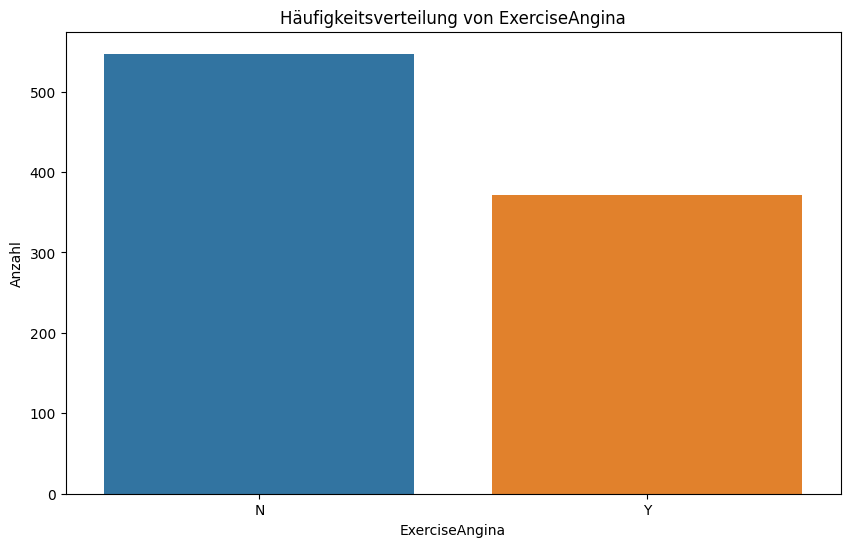

/var/folders/vr/klm94mws7lsd0vj7h5gd2bqw0000gn/T/ipykernel_30013/848146752.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='tab10')


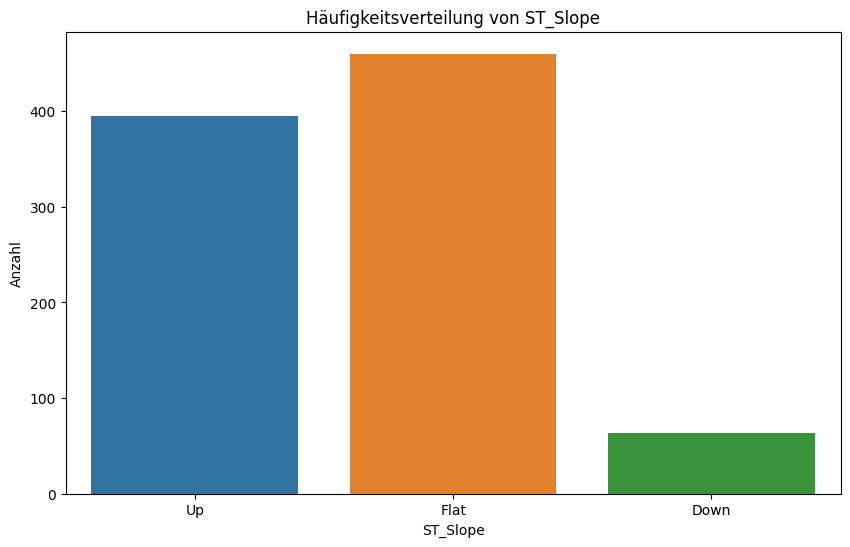

In [122]:
# Kategoriale Variablen identifizieren
kategoriale_spalten = df.select_dtypes(include=['object']).columns

# Häufigkeitsverteilungen anzeigen
for column in kategoriale_spalten:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette='tab10')
    plt.title(f'Häufigkeitsverteilung von {column}')
    plt.xlabel(column)
    plt.ylabel('Anzahl')
    plt.show()


#### Häufigkeitsverteilung nach der Zielvariable

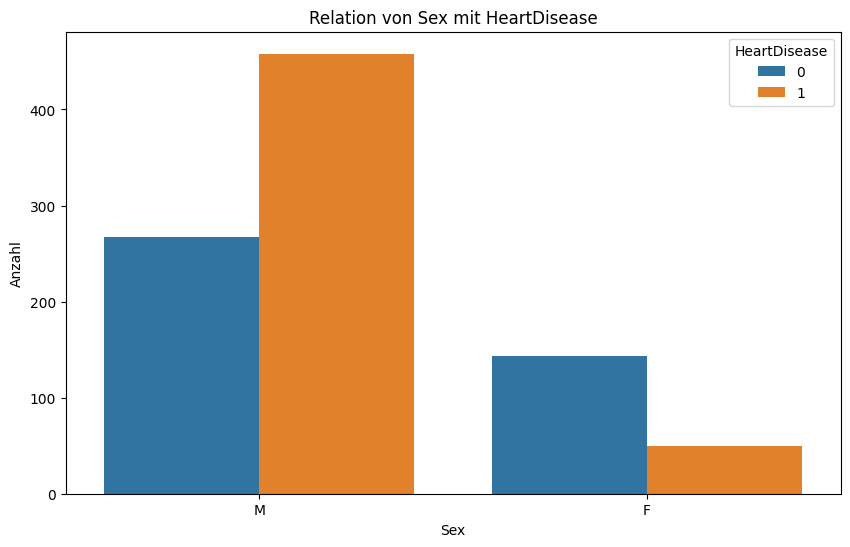

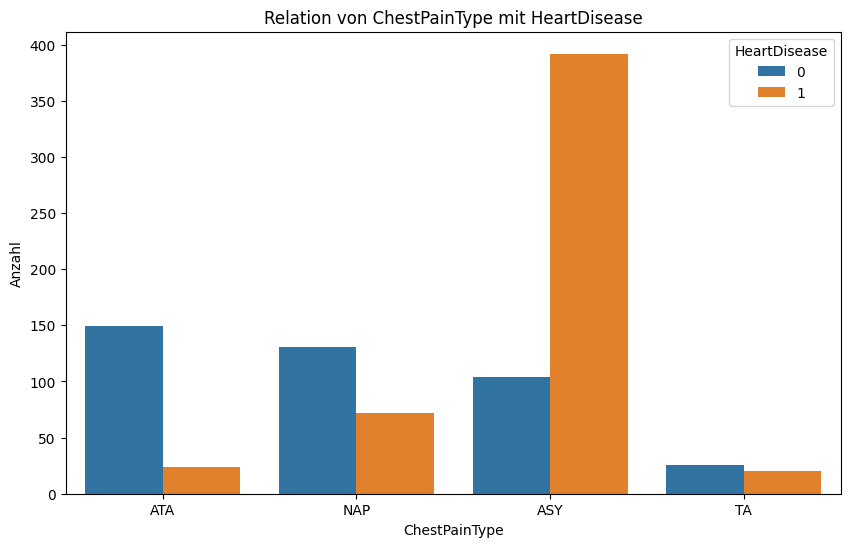

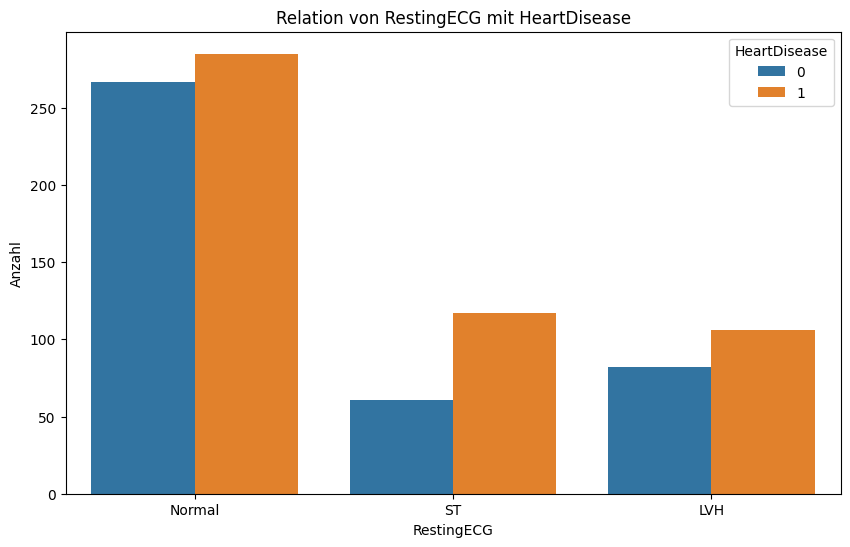

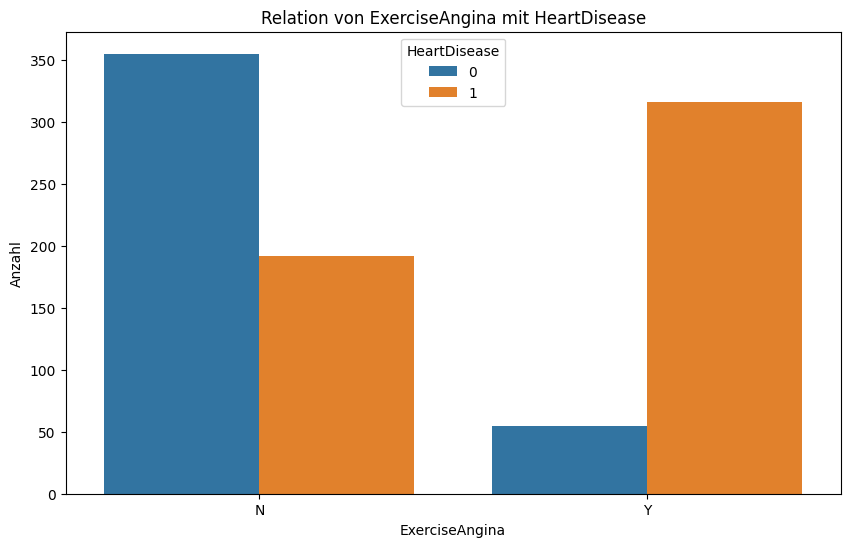

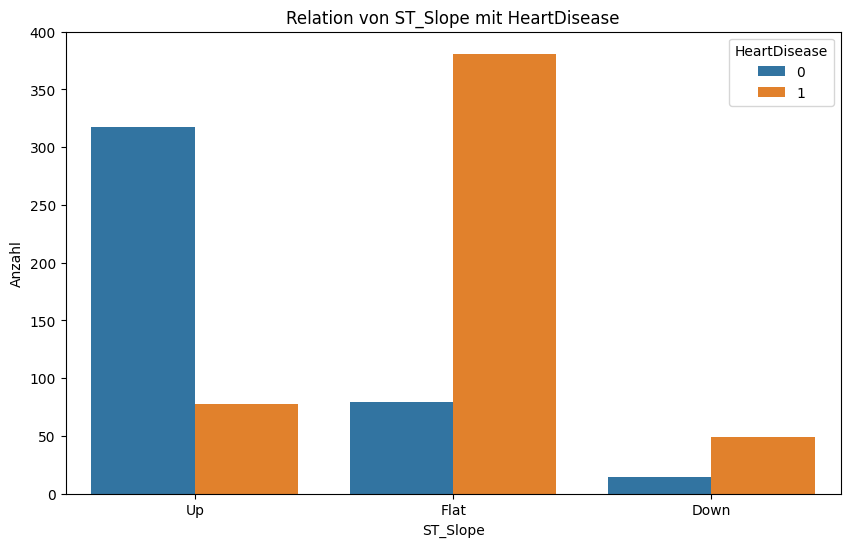

In [123]:
# Beziehung zwischen kategorialen Variablen und der Zielvariable
for column in kategoriale_spalten:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue='HeartDisease', palette='tab10')
    plt.title(f'Relation von {column} mit HeartDisease')
    plt.xlabel(column)
    plt.ylabel('Anzahl')
    plt.show()


### Tiefere Analyse der Feature

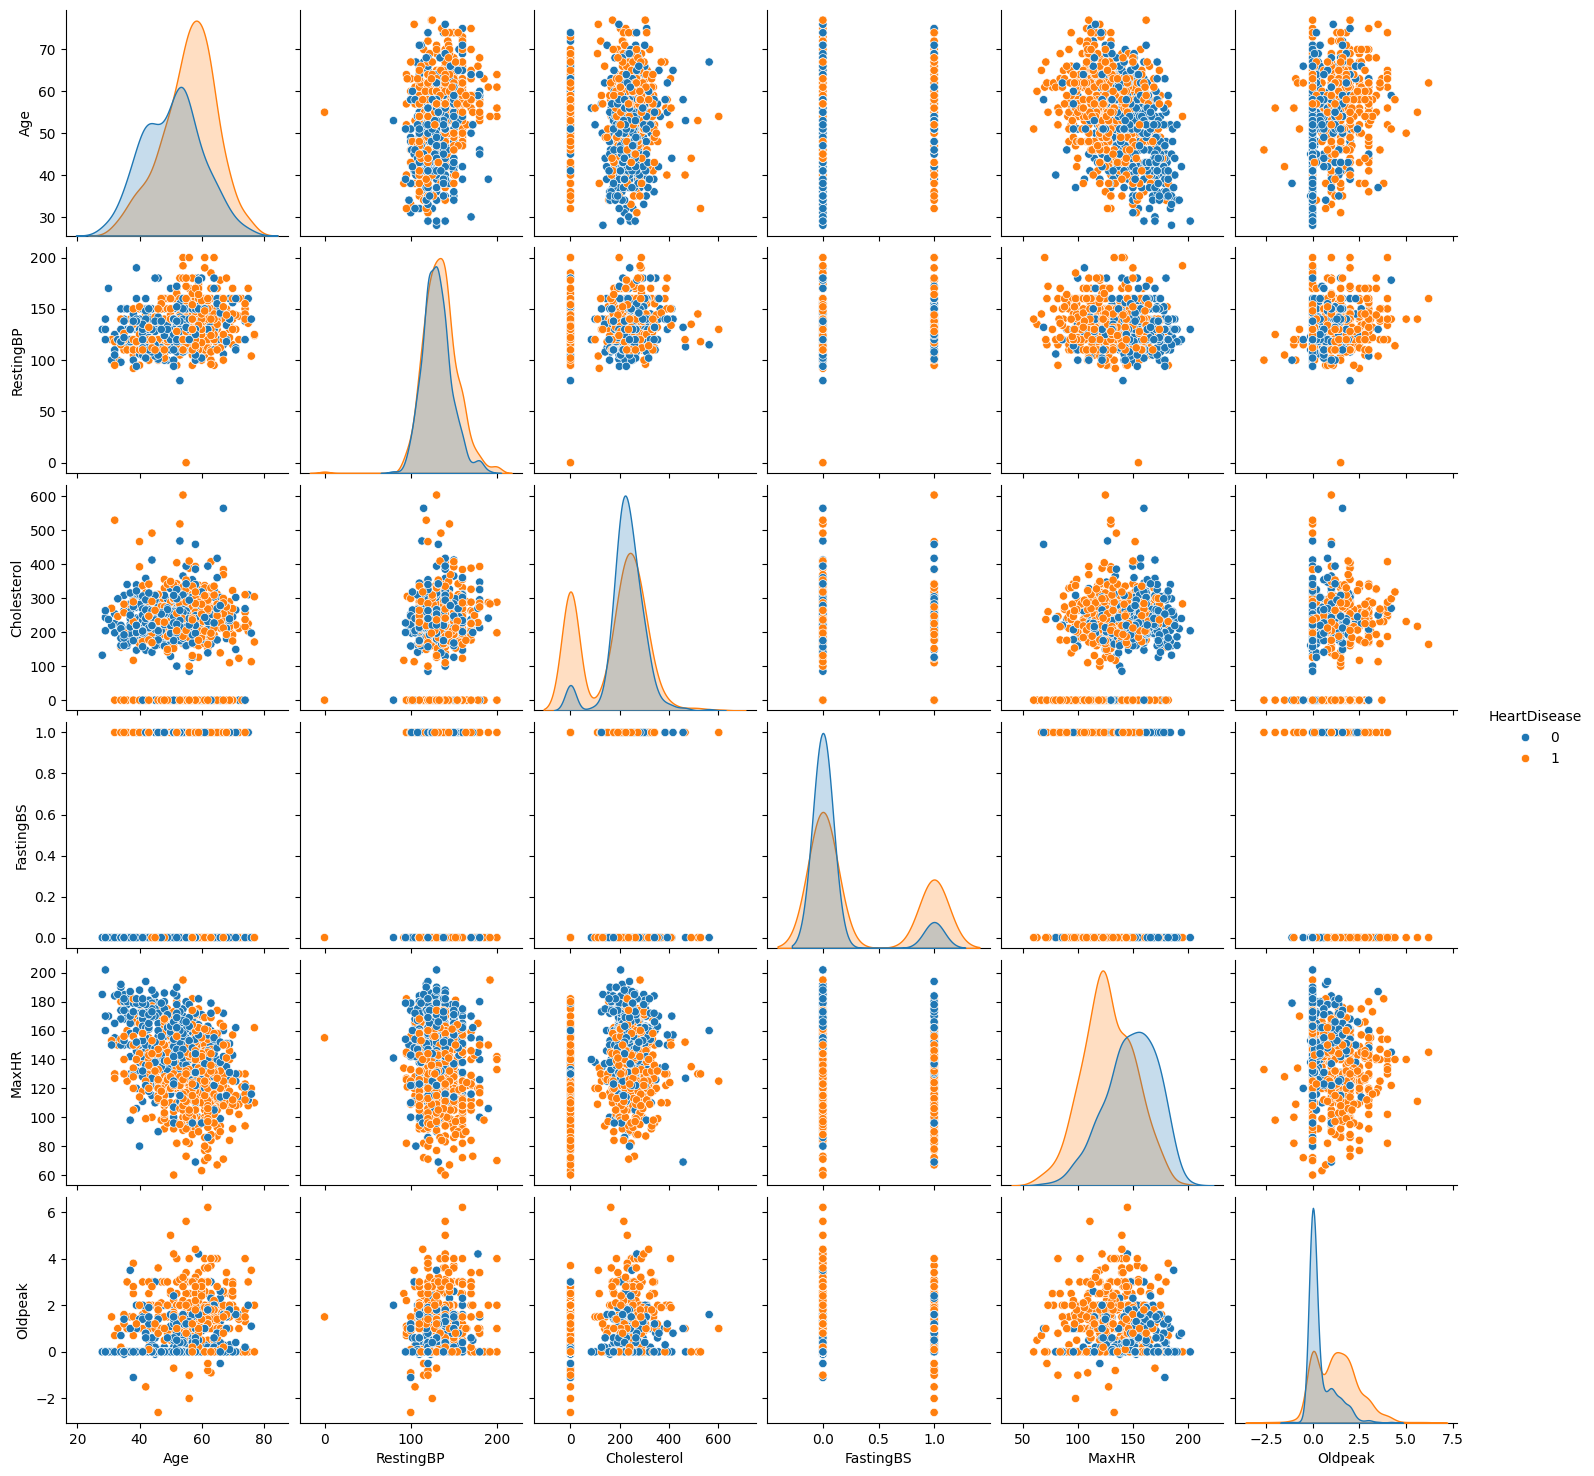

In [124]:
# Paarplot der numerischen Variablen
sns.pairplot(df, hue='HeartDisease', palette='tab10')
plt.show()

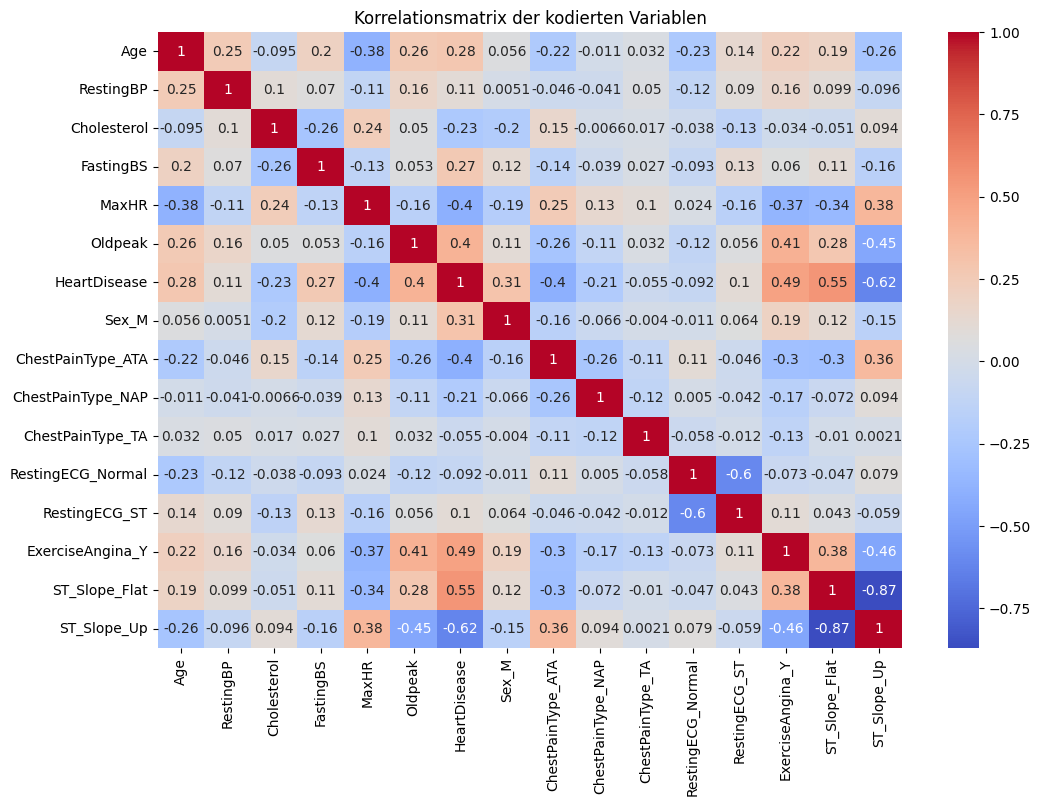

In [125]:
# Korrelationsmatrix für kategoriale Variablen
df_encoded = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Korrelationsmatrix der kodierten Variablen')
plt.show()


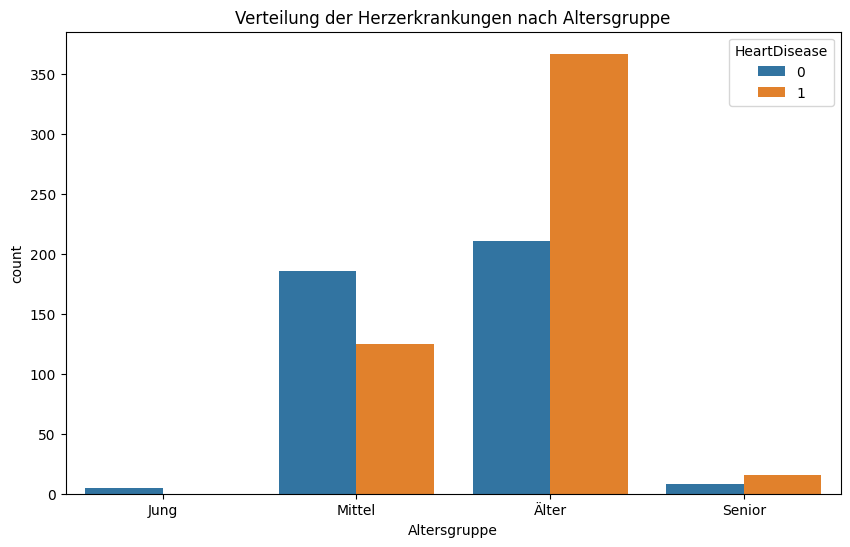

In [126]:
# Altersgruppenanalyse
ziel_variable = df['HeartDisease']

df['Altersgruppe'] = pd.cut(df['Age'], bins=[0, 30, 50, 70, 100], labels=['Jung', 'Mittel', 'Älter', 'Senior'])
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Altersgruppe', hue=ziel_variable)
plt.title('Verteilung der Herzerkrankungen nach Altersgruppe')
plt.show()


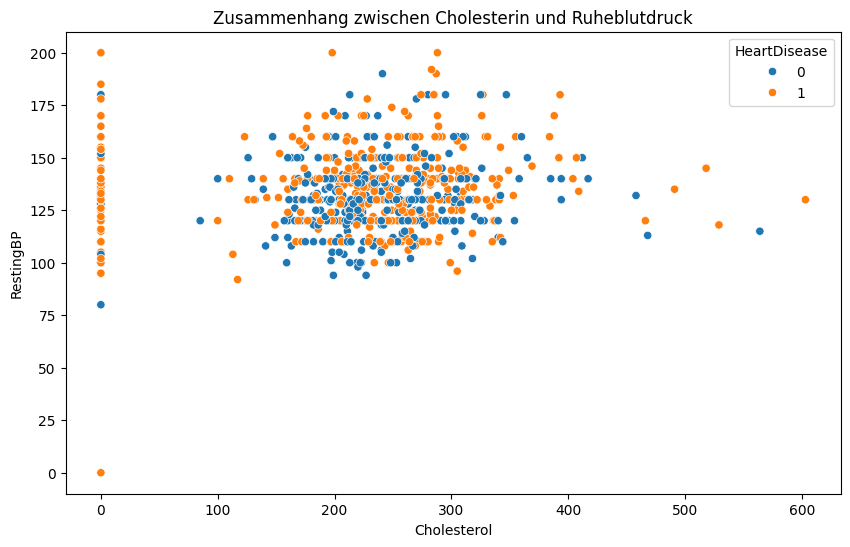

In [127]:
# Analyse des Zusammenhangs zwischen Cholesterin und Blutdruck
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cholesterol', y='RestingBP', hue=ziel_variable)
plt.title('Zusammenhang zwischen Cholesterin und Ruheblutdruck')
plt.show()


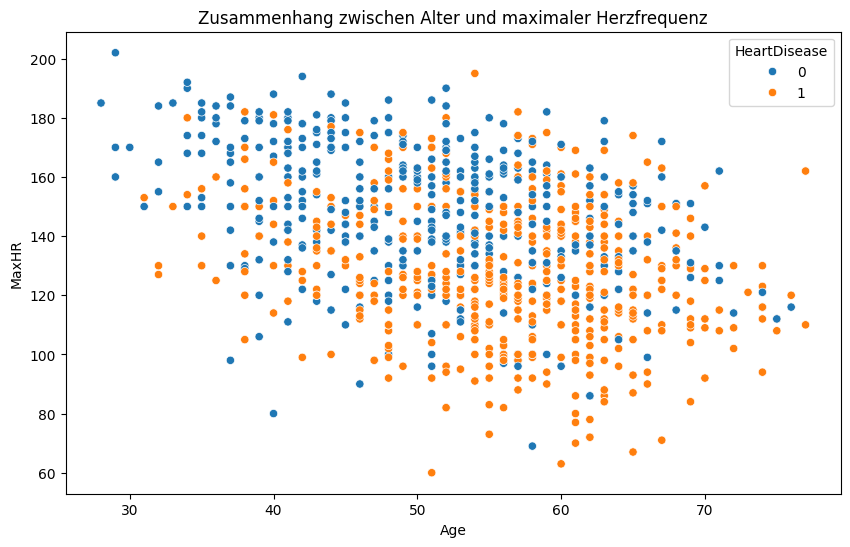

In [128]:
# Analyse des Zusammenhangs zwischen Alter und maximaler Herzfrequenz
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='MaxHR', hue=ziel_variable)
plt.title('Zusammenhang zwischen Alter und maximaler Herzfrequenz')
plt.show()

## Data Preparation 

### Datensatz bereinigen

In [129]:
# Fehlende Werte überprüfen
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
Altersgruppe      0
dtype: int64

In [130]:
df['Cholesterol'].isnull().sum()

0

In [131]:
df['Cholesterol']

0      289
1      180
2      283
3      214
4      195
      ... 
913    264
914    193
915    131
916    236
917    175
Name: Cholesterol, Length: 918, dtype: int64

In [132]:
df['Cholesterol'].loc[df['Cholesterol']==0].sum()

0

In [133]:
# Duplikate überprüfen und entfernen
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

0
0


In [134]:
# Nach Datentypen überprüfen
df.dtypes

Age                  int64
Sex                 object
ChestPainType       object
RestingBP            int64
Cholesterol          int64
FastingBS            int64
RestingECG          object
MaxHR                int64
ExerciseAngina      object
Oldpeak            float64
ST_Slope            object
HeartDisease         int64
Altersgruppe      category
dtype: object

### Feature Engineering

We have 2 options for data scaling : 1) Normalization 2) Standardization. As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.
Normalization : Oldpeak feature is normalized as it had displayed a right skewed data distribution.
Standardizarion : Age, RestingBP, Cholesterol and MaxHR features are scaled down because these features are normally distributed.


https://www.kaggle.com/code/tanmay111999/heart-failure-prediction-cv-score-90-5-models#Feature-Engineering

#### Altersgruppen bilden

In [135]:
# Feature Erstellung und Transformation
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Middle-aged', 'Senior'])


#### Gruppen für Olpeak

In [136]:
# Oldpeak in Bins einteilen
bins = [-1, 0, 2, 4, float('inf')]
labels = ['Normal', 'Mild', 'Moderate', 'Severe']
df['OldpeakBinned'] = pd.cut(df['Oldpeak'], bins=bins, labels=labels)

#### Auswahl der Features

In [137]:
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'AgeGroup', 'OldpeakBinned']
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [144]:
# Numerische Features aufteilen
features_to_standardize = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']
other_numeric_features = ['FastingBS']

# Pipeline für zu normalisierende Features
normalize_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('normalizer', MinMaxScaler())
])

# Pipeline für zu standardisierende Features
standardize_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline für andere numerische Features
other_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Preprocessing Pipeline für kategorische Daten (unverändert)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Kombination der Preprocessing Schritte
preprocessor = ColumnTransformer(
    transformers=[
        ('normalize', normalize_transformer, features_to_normalize),
        ('standardize', standardize_transformer, features_to_standardize),
        ('other_num', other_numeric_transformer, other_numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Trainings- und Testdatensätze

In [145]:
# Aufteilen der Daten in Trainings- und Testdatensätze
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelle
### Definition

In [146]:
# Modelle definieren
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

### Hyperparameter 

In [147]:
# Hyperparameter Tuning für Logistic Regression
param_dist_lr = {
    'classifier__C': np.logspace(-4, 4, 20),
    'classifier__solver': ['lbfgs', 'liblinear']
}

# Hyperparameter Tuning für Random Forest
param_dist_rf = {
    'classifier__n_estimators': [50, 100, 200, 300, 400],
    'classifier__max_depth': [None, 10, 20, 30, 40],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Hyperparameter Tuning für Support Vector Machine
param_dist_svm = {
    'classifier__C': np.logspace(-4, 4, 20),
    'classifier__gamma': np.logspace(-4, 4, 20),
    'classifier__kernel': ['rbf', 'poly', 'sigmoid']
}

# Hyperparameter Tuning für Gradient Boosting
param_dist_gb = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'classifier__max_depth': [3, 4, 5, 6]
}

# Hyperparameter Random Dist definieren
param_dists = {
    'Logistic Regression': param_dist_lr,
    'Random Forest': param_dist_rf,
    'Support Vector Machine': param_dist_svm,
    'Gradient Boosting': param_dist_gb
}

### Random und Grid Search

In [148]:
# Funktion für Random Search und Grid Search
def random_and_grid_search(models, param_dists, X_train, y_train, X_test, y_test):
    best_estimators = {}
    for name, model in models.items():
        clf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', model)])
        
        # Randomized Search
        random_search = RandomizedSearchCV(clf, param_dists[name], n_iter=50, cv=5, n_jobs=-1, random_state=42)
        random_search.fit(X_train, y_train)
        
        # Grid Search mit den besten Parametern aus Randomized Search
        best_params = random_search.best_params_
        refined_params = {k: [v] for k, v in best_params.items()}
        grid_search = GridSearchCV(clf, refined_params, cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        best_estimators[name] = grid_search.best_estimator_
        y_pred = best_estimators[name].predict(X_test)
        
        print(f"Best Model: {name}")
        print("Best Parameters from Randomized Search:", best_params)
        print("Best Parameters from Grid Search:", grid_search.best_params_)
        print(classification_report(y_test, y_pred))
        print("\n")
        
    return best_estimators

## Evaluation

In [149]:


# Ausführung des Hyperparameter-Tunings und der Evaluation
best_models = random_and_grid_search(models, param_dists, X_train, y_train, X_test, y_test)

best_models


/Users/noah/anaconda3/envs/dski_ml/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Model: Logistic Regression
Best Parameters from Randomized Search: {'classifier__solver': 'lbfgs', 'classifier__C': 29.763514416313132}
Best Parameters from Grid Search: {'classifier__C': 29.763514416313132, 'classifier__solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.78      0.86      0.81        77
           1       0.89      0.82      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



Best Model: Random Forest
Best Parameters from Randomized Search: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 20}
Best Parameters from Grid Search: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
              precision    recall  f1-score   support

  

{'Logistic Regression': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('normalize',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('normalizer',
                                                                    MinMaxScaler())]),
                                                   ['Oldpeak']),
                                                  ('standardize',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='median')),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                